# PRELIMINARIES

In [1]:
# interactive plots setup
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# sympy setup
import sympy as sp
sp.init_printing()
from sympy.vector import *

# ploting customizations
from matplotlib import pyplot as plt
size=16
params = {'legend.fontsize': 'large',
#          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.875,
          'ytick.labelsize': size*0.875,
          'axes.titlepad': 25}
plt.rcParams.update(params)
%matplotlib inline

# numerics
import numpy as np

# to save plots as files and download them
#from google.colab import files

## Credit

Initial solution written by [Ivan C. Christov](http://christov.tmnt-lab.org), Purdue University.

# PROBLEM STATEMENT

(b) Solve $\frac{dy}{dx} = x y$ for $y(x)$ subject to $y(0)=y_0$.

(d) Solve $\frac{d^2 x}{dt^2} = -k\left(\frac{dx}{dt}\right)^2$ for $x(t)$ subject to $x(0)=0$ and $\frac{dx}{dt}(t=0)=v_0$.

(e) Sketch, diagram or plot the solution from (d) for a few values of $k$ and $v_0$ of your choosing.

(f) Consider the ODE $\frac{df}{dt} + a(t) f = b(t)$. Find the solution $f(t)$, given $f(0) = f_0$ and arbitrary $a(t)$ and $b(t)$.

(h) Find the general solution $f(t)$ of the ODE $f'' + c_2 f = c_3$ (no need to apply initial conditions -- I haven't given you any).

# SOLUTION


## (b)

Let's use SymPy's [capabilities](https://docs.sympy.org/dev/guides/solving/solve-ode.html) to obtain an analytical solution, whcih we can use to check our work.

To do so, we write the ODE as
$$\frac{d y}{d x} - xy = 0. $$

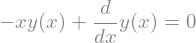

In [2]:
x = sp.symbols('x')
y0 = sp.symbols('y0')
y = sp.Function('y')(x)

dydx = y.diff(x)

# this is the ODE we will solve
ODE = sp.Eq(dydx - x*y, 0)
ODE # to print it, so we can check it

In [3]:
solution = sp.dsolve(ODE, y, ics={y.subs(x, 0): y0})
solution # to print the solution

## (d)

Again, we write the ODE as
$$\frac{d^2 x}{dt^2} + k \left(\frac{dx}{dt}\right)^2 = 0. $$

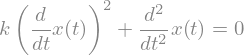

In [4]:
t = sp.symbols('t')
k = sp.symbols('k')
v0 = sp.symbols('v0')
x = sp.Function('x')(t)

dxdt = x.diff(t)
d2xdt2 = dxdt.diff(t)

# this is the ODE we will solve
ODE = sp.Eq(d2xdt2 + k*(dxdt)**2, 0)
ODE # to print it, so we can check it

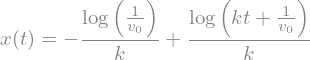

In [5]:
solution = sp.dsolve(ODE, x, ics={x.subs(t, 0): 0, dxdt.subs(t, 0): v0})
solution # to print the solution

And we can use the SymPy `simplify` command (also implemented as an object property function) to try to make it look nicer.

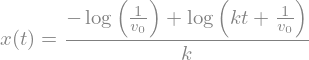

In [6]:
solution.simplify()

It didn't help much since it is conservative on how it simplifies logarithms.

We would've needed to tell it that $t>0$ (time is positive), the drag coefficient $k>0$ and the initial motion (and velocity) to the right, $v_0>0$. So, we can redo the solution as:

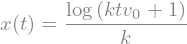

In [7]:
t  = sp.symbols('t', positive=True)
k  = sp.symbols('k', positive=True)
v0 = sp.symbols('v0', positive=True)
x = sp.Function('x')(t)
xprime = x.diff(t)
xdoubleprime = xprime.diff(t)
ODE = xdoubleprime + k*(xprime)**2
solution = sp.dsolve(ODE, x, ics={x.subs(t, 0): 0, xprime.subs(t, 0): v0})
solution.simplify()

That's better!

## (e)

To plot the solution, we need to convert the SymPy symbolic expression for $x(t)$ into a form that SciPy can evaluate numerically. We use [lambdify](https://docs.sympy.org/latest/modules/utilities/lambdify.html) and build in the paramters $k$ and $v_0$ as inputs of the evaluated function, in addtion to $t$.

Keep in mind that 'solution' is an equation (as seen above), so we use the 'rhs' attribute to grab the right-hand side.

In [8]:
xoft = sp.lambdify((t, k, v0), solution.rhs)

In [9]:
# check a value to make sure it works,
# so, evaluate x(t) for t=0, k=0.1, and v0=1.3
xoft(t=1,k=0.1,v0=1.3)

Make an [interactive](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) plot to see the effect of $k$ and $v_0$ on the solution $x(t)$.

In [10]:
def plot_func(k,v0):
  tplot = np.linspace(0,10,num=100)
  xplot = xoft(tplot,k,v0)

  ax = plt.gca()
  ax.set_ylabel('$x(t)$')
  ax.set_xlabel('$t$')

  ax.plot(tplot, xplot)

  plt.show()

interact(plot_func, k = widgets.FloatSlider(min=0.01, max=5, step=0.1),
                    v0 = widgets.FloatSlider(min=1, max=10, step=0.5) );

interactive(children=(FloatSlider(value=0.01, description='k', max=5.0, min=0.01), FloatSlider(value=1.0, desc…

Make a combination plot for several $k$ and $v_0$ of my choosing, using some fun [colors from Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html) to group the curves by $k$ value visually.

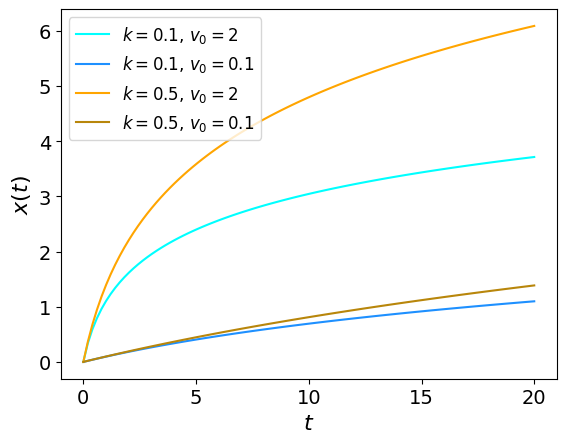

In [11]:
tplot = np.linspace(0,20,num=100)

ax = plt.gca()
ax.set_ylabel('$x(t)$')
ax.set_xlabel('$t$')

ax.plot(tplot, xoft(tplot,1,2), label=r'$k=0.1$, $v_0=2$', color='cyan')
ax.plot(tplot, xoft(tplot,1,0.1), label=r'$k=0.1$, $v_0=0.1$', color='dodgerblue')

ax.plot(tplot, xoft(tplot,0.5,2), label=r'$k=0.5$, $v_0=2$', color='orange')
ax.plot(tplot, xoft(tplot,0.5,0.1), label=r'$k=0.5$, $v_0=0.1$', color='darkgoldenrod')

ax.legend()

plt.savefig("Prob6e_plot.pdf")
# to and download the file on colab
#files.download("Prob6e_plot.pdf")

Large $k$ means larger drag, and the rocket doesn't go as far, $x(t)$ remains small.

A larger initial velocity $v_0$ sends it farther, but eventually the drag slows it down.

To see how it slows down, we could plot the velocity, $v(t) = dx/dt$ too. We observe it always decays to 0, but how fast it decays depends on $k$ and $v_0$.

In [12]:
voft = sp.lambdify((t, k, v0), solution.rhs.diff(t))

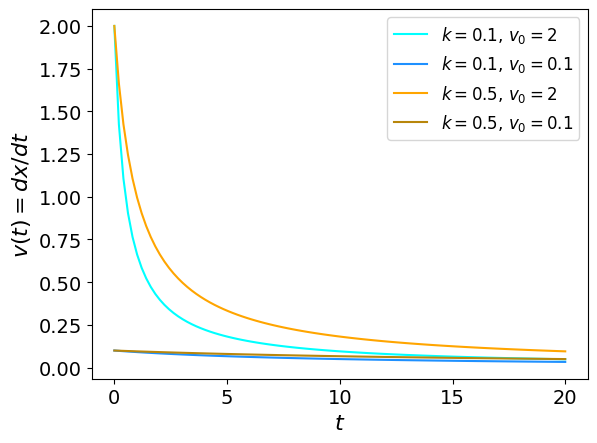

In [13]:
tplot = np.linspace(0,20,num=100)

ax = plt.gca()
ax.set_ylabel('$v(t) = dx/dt$')
ax.set_xlabel('$t$')

ax.plot(tplot, voft(tplot,1,2), label=r'$k=0.1$, $v_0=2$', color='cyan')
ax.plot(tplot, voft(tplot,1,0.1), label=r'$k=0.1$, $v_0=0.1$', color='dodgerblue')

ax.plot(tplot, voft(tplot,0.5,2), label=r'$k=0.5$, $v_0=2$', color='orange')
ax.plot(tplot, voft(tplot,0.5,0.1), label=r'$k=0.5$, $v_0=0.1$', color='darkgoldenrod')

ax.legend()

plt.show()

## (f)

We wish to solve $\frac{df}{dt} + a(t) f = b(t)$ given $f(0) = f_0$ and arbitrary $a(t)$ and $b(t)$.

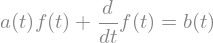

In [14]:
t  = sp.symbols('t', positive=True)
f0  = sp.symbols('f0', positive=True)
f = sp.Function('f')(t)
a = sp.Function('a')(t)
b = sp.Function('b')(t)

dfdt = f.diff(t)

# this is the the ODE we will solve
ODE = sp.Eq(dfdt + a*f , b)
ODE # to print it, so we can check it


Sometimes it helps to give SympPy [hints](https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.single.FirstLinear) for solving ODEs.

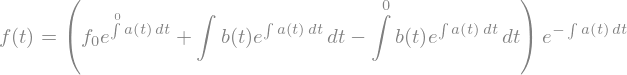

In [15]:
solution = sp.dsolve(ODE, f, ics={f.subs(t,0): f0}, hint='1st_linear_Integral')
solution.simplify() # to print the solution

The solution looks a little weird because $\int$ is the indefinite integral and $\int\limits_{}^{0}$ is the indefinite integral evaluated at $t=0$.

## (h)

Again, we write the ODE as
$$f'' + c_2 f - c_3 = 0. $$

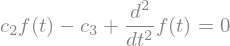

In [16]:
t  = sp.symbols('t', positive=True)
c2 = sp.symbols('c2')
c3 = sp.symbols('c3')
f  = sp.Function('f')(t)

fprime = f.diff(t)
fprimeprime = fprime.diff(t)

# this is the ODE we will solve
ODE = sp.Eq(fprimeprime + c2*f - c3, 0)
ODE # to print it, so we can check it

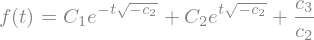

In [17]:
solution = sp.dsolve(ODE, f)
solution # to print the solution

On your own, go back and specify that `positive=True` for `c2`.

Does the simplified answer look different?